In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
# load data set
# shuffle dataset
# split training 70 validation 10 and test 20 %
# split inputs and labels (output)
# one hot coding
# fit model without validation compare training and testing acuracies
# fit mode with validation (with history)
# create graph 
# adjust epoch pased on graph 
# check testing and training accuracies are matched or not
# (chapter 3: Listing  3:17,3:18,3:19,3:20)

In [3]:
dataset = pd.read_csv('sonar.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:

dataset=shuffle(dataset)
dataset = np.array(dataset)

In [82]:
train_d = dataset[:145,:60].astype('float')
train_l = dataset[:145,60:61]

train_v = dataset[146:165,:60].astype('float')
train_v_l= dataset[146:165,60:61]

test_d  = dataset[166:,:60].astype('float')
test_l = dataset[166:,60:61]
test_d

array([[0.0131, 0.0387, 0.0329, ..., 0.0009, 0.0015, 0.0085],
       [0.031 , 0.0221, 0.0433, ..., 0.0056, 0.0067, 0.0054],
       [0.027 , 0.0092, 0.0145, ..., 0.0132, 0.007 , 0.0088],
       ...,
       [0.115 , 0.1163, 0.0866, ..., 0.0141, 0.0068, 0.0086],
       [0.0162, 0.0253, 0.0262, ..., 0.01  , 0.0048, 0.0019],
       [0.013 , 0.012 , 0.0436, ..., 0.0009, 0.0033, 0.0026]])

In [40]:
train_d

array([[0.0443, 0.0446, 0.0235, ..., 0.0115, 0.0152, 0.01  ],
       [0.0188, 0.037 , 0.0953, ..., 0.0057, 0.0068, 0.0024],
       [0.0131, 0.0068, 0.0308, ..., 0.0013, 0.0052, 0.0023],
       ...,
       [0.0239, 0.0189, 0.0466, ..., 0.0026, 0.0036, 0.0024],
       [0.0378, 0.0318, 0.0423, ..., 0.0062, 0.0043, 0.0053],
       [0.0283, 0.0599, 0.0656, ..., 0.0033, 0.0045, 0.0079]])

In [83]:


encoder = LabelEncoder()
encoder.fit(dataset[:,60:61])

y_train = encoder.transform(train_l)
y_train_v = encoder.transform(train_v_l)
y_test = encoder.transform(test_l)



C:\Users\tehse\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tehse\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
epoch = 143
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(60,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [130]:
model.compile(optimizer = 'rmsprop' ,loss='binary_crossentropy',metrics=['accuracy'])

In [131]:
history = model.fit(train_d,
    y_train,
    epochs=epoch,
    batch_size=16)


Train on 145 samples
Epoch 1/143
145/145 [==============================] - 1s 4ms/sample - loss: 0.6786 - accuracy: 0.5793
Epoch 2/143
145/145 [==============================] - 0s 200us/sample - loss: 0.6526 - accuracy: 0.7586
Epoch 3/143
145/145 [==============================] - 0s 200us/sample - loss: 0.6418 - accuracy: 0.7103
Epoch 4/143
145/145 [==============================] - 0s 227us/sample - loss: 0.6253 - accuracy: 0.7586
Epoch 5/143
145/145 [==============================] - 0s 186us/sample - loss: 0.6244 - accuracy: 0.7172
Epoch 6/143
145/145 [==============================] - 0s 179us/sample - loss: 0.6079 - accuracy: 0.7586
Epoch 7/143
145/145 [==============================] - 0s 262us/sample - loss: 0.5975 - accuracy: 0.7310
Epoch 8/143
145/145 [==============================] - 0s 248us/sample - loss: 0.5897 - accuracy: 0.7310
Epoch 9/143
145/145 [==============================] - 0s 193us/sample - loss: 0.5801 - accuracy: 0.7517
Epoch 10/143
145/145 [==============

145/145 [==============================] - 0s 193us/sample - loss: 0.2686 - accuracy: 0.9103
Epoch 79/143
145/145 [==============================] - 0s 200us/sample - loss: 0.2723 - accuracy: 0.8828
Epoch 80/143
145/145 [==============================] - 0s 193us/sample - loss: 0.2871 - accuracy: 0.8552
Epoch 81/143
145/145 [==============================] - 0s 193us/sample - loss: 0.2719 - accuracy: 0.8690
Epoch 82/143
145/145 [==============================] - 0s 221us/sample - loss: 0.2620 - accuracy: 0.9034
Epoch 83/143
145/145 [==============================] - 0s 214us/sample - loss: 0.2608 - accuracy: 0.9034
Epoch 84/143
145/145 [==============================] - 0s 221us/sample - loss: 0.2812 - accuracy: 0.8828
Epoch 85/143
145/145 [==============================] - 0s 234us/sample - loss: 0.2673 - accuracy: 0.8759
Epoch 86/143
145/145 [==============================] - 0s 227us/sample - loss: 0.2538 - accuracy: 0.9172
Epoch 87/143
145/145 [==============================] - 0s 

In [132]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy'])

In [141]:
history_validation = model.fit(train_d,
    y_train,
    epochs=23,
    batch_size=16,
    validation_data=(train_v, y_train_v))


Train on 145 samples, validate on 19 samples
Epoch 1/23
145/145 [==============================] - 0s 296us/sample - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.2722 - val_accuracy: 0.8947
Epoch 2/23
145/145 [==============================] - 0s 276us/sample - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 3/23
145/145 [==============================] - 0s 262us/sample - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.2628 - val_accuracy: 0.8947
Epoch 4/23
145/145 [==============================] - 0s 296us/sample - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0738 - val_accuracy: 0.9474
Epoch 5/23
145/145 [==============================] - 0s 255us/sample - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.1728 - val_accuracy: 0.8947
Epoch 6/23
145/145 [==============================] - 0s 269us/sample - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 7/23
145/145 [==============================] - 0s 276us/sample - loss: 0

In [134]:
history_dict_v = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy'])

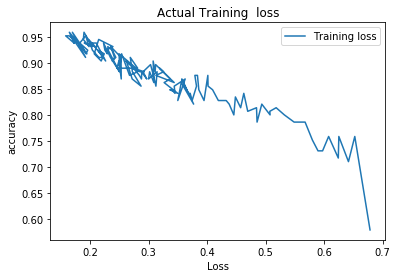

In [135]:
import matplotlib.pyplot as plt
loss = history_dict['loss']
accuracy = history_dict['accuracy']
plt.plot(loss,accuracy, label='Training loss')
plt.title('Actual Training  loss')
plt.xlabel('Loss')
plt.ylabel('accuracy')
plt.legend()

plt.show()

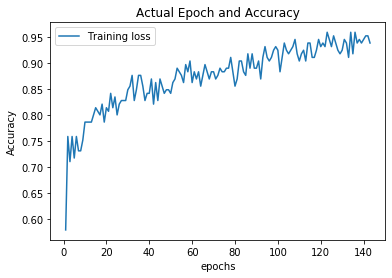

In [136]:

loss = history_dict['loss']
epochs = range(1, len(accuracy) + 1)
accuracy = history_dict['accuracy']
plt.plot(epochs,accuracy, label='Training loss')
plt.title('Actual Epoch and Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

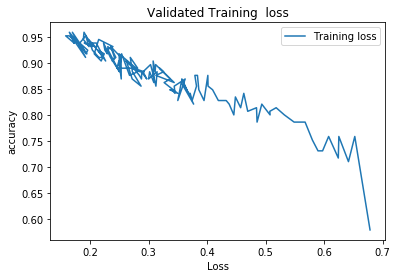

In [137]:
loss = history_dict_v['loss']
accuracy = history_dict_v['accuracy']
plt.plot(loss,accuracy, label='Training loss')
plt.title('Validated Training  loss')
plt.xlabel('Loss')
plt.ylabel('accuracy')
plt.legend()

plt.show()

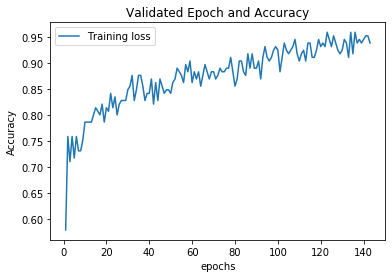

In [138]:
loss = history_dict_v['loss']
epochs = range(1, len(accuracy) + 1)
accuracy = history_dict_v['accuracy']
plt.plot(epochs,accuracy, label='Training loss')
plt.title('Validated Epoch and Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [139]:
results = model.evaluate(test_d, y_test)

42/42 [==============================] - 0s 143us/sample - loss: 1.6693 - accuracy: 0.6905
